<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Подготовка-данных" data-toc-modified-id="1.-Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Подготовка данных</a></span></li><li><span><a href="#1.1-Загрузка-данных" data-toc-modified-id="1.1-Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1.1 Загрузка данных</a></span></li><li><span><a href="#1.2-Предобработка-данных" data-toc-modified-id="1.2-Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>1.2 Предобработка данных</a></span></li><li><span><a href="#1.3-Подготовка-признаков" data-toc-modified-id="1.3-Подготовка-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>1.3 Подготовка признаков</a></span></li><li><span><a href="#2.-Исследование-задачи" data-toc-modified-id="2.-Исследование-задачи-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2. Исследование задачи</a></span></li><li><span><a href="#2.1-Исследование-баланса-классов" data-toc-modified-id="2.1-Исследование-баланса-классов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2.1 Исследование баланса классов</a></span></li><li><span><a href="#2.1-Обучение-моделей-без-учета-дисбаланса-классов" data-toc-modified-id="2.1-Обучение-моделей-без-учета-дисбаланса-классов-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2.1 Обучение моделей без учета дисбаланса классов</a></span></li><li><span><a href="#3.-Борьба-с-дисбалансом" data-toc-modified-id="3.-Борьба-с-дисбалансом-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>3. Борьба с дисбалансом</a></span></li><li><span><a href="#3.1-Взвешивание-классов" data-toc-modified-id="3.1-Взвешивание-классов-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>3.1 Взвешивание классов</a></span></li><li><span><a href="#3.2-Увеличение-выборки" data-toc-modified-id="3.2-Увеличение-выборки-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>3.2 Увеличение выборки</a></span></li><li><span><a href="#3.2-Уменьшение-выборки" data-toc-modified-id="3.2-Уменьшение-выборки-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>3.2 Уменьшение выборки</a></span></li><li><span><a href="#4.-Тестирование-модели" data-toc-modified-id="4.-Тестирование-модели-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>4. Тестирование модели</a></span></li><li><span><a href="#5.-Общий-вывод" data-toc-modified-id="5.-Общий-вывод-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>5. Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)


**Описание данных:
Признаки**
RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата
**Целевой признак**
Exited — факт ухода клиента

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

import warnings
warnings.filterwarnings('ignore')

## 1. Подготовка данных
## 1.1 Загрузка данных
Загрузим и подготовим данные.

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv("C:/Users/chern/Churn.csv")
    
display(data.head(20))
display(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

## 1.2 Предобработка данных
Исправим стилистические ошибки в именовании столбцов:

In [3]:
data = data.rename(columns=lambda x: re.sub(r'(?<!^)([A-Z])', r'_\1', x).lower())  
data

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Проверим на наличие дубликатов:

In [4]:
data.duplicated().sum()

0

Проверим на наличие пропусков:

In [5]:
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [6]:
data['tenure'].isna().sum() / len(data['tenure'])*100

9.09

Пропуски составляют 9,09% от всех данных в столбце tenure. Заполним пропуски 0:

In [7]:
data['tenure'] = data['tenure'].fillna(0)

Заменим тип значений в столбце , т.к. в датасете указывается полное количество лет. 

In [8]:
data['tenure'] = data['tenure'].astype(int)

Снова выведеи информацию о датафрейме:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 1.3 Подготовка признаков

Удалим лишние для обучения столбцы

In [10]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)
data.shape

(10000, 11)

Преобразуем категориальные признаки в численные техникой  .get_dummies, уберем один столбец, чтобы избежать дамми-ловушек

In [11]:
ohe_data = pd.get_dummies(data, drop_first=True)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  int64  
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


Разобъем данные на 3 выборки в соотношении 60-20-20:
- тренерующую
- валидационную
- тестовую

In [12]:
data_train, data_t_v = train_test_split(ohe_data, test_size=0.40, random_state=12345)
data_valid, data_test = train_test_split(data_t_v, test_size=0.50, random_state=12345)

print('Размер тренериующей выборки', data_train.shape[0])
print('Размер валидационной выборки', data_valid.shape[0])
print('Размер тестовой выборки', data_test.shape[0])

Размер тренериующей выборки 6000
Размер валидационной выборки 2000
Размер тестовой выборки 2000


Разделим данные в трех выборках на обычные признаки и целевые признаки: 

In [13]:
features_train = data_train.drop(['exited'], axis=1)
target_train = data_train['exited']

features_valid = data_valid.drop(['exited'], axis=1)
target_valid = data_valid['exited']

features_test = data_test.drop(['exited'], axis=1)
target_test = data_test['exited']

Масштабируем численные признаки стандартизацией:

In [14]:
numeric = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler() 
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,8,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,8,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,3,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,6,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,2,1.140475,-0.891560,0,0,1.524268,1,0,0


**Вывод:**
Данные содержат 14 столбцов и 10 тыс строк. 
В результате предобработки данных исправили стилистические ошибки в именовании столбцов.
Убрали лишние для обучения столбцы.
Обработали столбец tenure: заполнили пропуски нулями, поменяли тип значения на integer, т.к. в столбце содержатся только целые числа.

Разбили данные на 3 выборки: тренирующую, валидационную и тестовую.
Разбили данные на обычные признаки и целевые признаки.

Подготовили категориальные признаки для обучения, применив технику  .get_dummies, убрали один столбец, чтобы избежать дамми-ловушек.
Масштабировали численные признаки стандартизацией.

## 2. Исследование задачи
## 2.1 Исследование баланса классов

0    0.7963
1    0.2037
Name: exited, dtype: float64


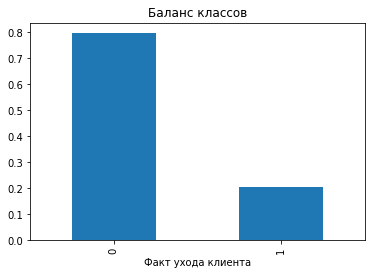

In [15]:
class_frequency = ohe_data['exited'].value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar')
plt.title('Баланс классов')
plt.xlabel('Факт ухода клиента')
plt.show();

На графике видим, что соотношение классов 80% к 20%, а значит рнаблюдается явный дисбаланс. 

## 2.1 Обучение моделей без учета дисбаланса классов
Обучим данные на трех моделях:
- Дерево решений
- Случайный лес
- Логистическая регрессия

Ввиду дисбаланса классов, вместо accuracy используем метрики: recall, precesion и их среднее гармоническое - F1-меру. 

Обучим модели:

In [16]:
%%time

best_model = None
best_result = 0 

for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    valid_predictions = model.predict(features_valid)
    f1_valid = f1_score(target_valid, valid_predictions)
    
    if f1_valid > best_result:
        best_model = model
        best_result = f1_valid

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)
print("Лучший результат:", best_result)
print("Лучшая модель:", best_model)

Precision 0.4900990099009901
Recall 0.47368421052631576
F1-мера: 0.4817518248175182
Лучший результат: 0.5786516853932585
Лучшая модель: DecisionTreeClassifier(max_depth=9, random_state=12345)
CPU times: user 809 ms, sys: 8.37 ms, total: 818 ms
Wall time: 819 ms


In [17]:
%%time

best_model = None
best_result = 0 

for est in range(1, 30):
    model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=est)
    model.fit(features_train, target_train)
    valid_predictions = model.predict(features_valid)
    f1_valid = f1_score(target_valid, valid_predictions) 
    
    if f1_valid > best_result:
        best_model = model
        best_result = f1_valid

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)
print("Лучший результат:", best_result)
print("Лучшая модель:", best_model)



Precision 0.8127853881278538
Recall 0.4258373205741627
F1-мера: 0.5588697017268446
Лучший результат: 0.5818181818181819
Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=8, random_state=12345)
CPU times: user 2.6 s, sys: 14.5 ms, total: 2.62 s
Wall time: 2.62 s


In [18]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
f1_valid = f1_score(target_valid, valid_predictions)

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)

Precision 0.5657142857142857
Recall 0.23684210526315788
F1-мера: 0.33389544688026984
CPU times: user 31.9 ms, sys: 48 ms, total: 79.9 ms
Wall time: 92.1 ms


Построим ROC-кривую и оценим метрику классификации AUC-ROC:

AUC-ROC DecisionTreeClassifier 0.7899719632952051
AUC-ROC RandomForestClassifier 0.8448537373199692
AUC-ROC LogisticRegression 0.7586272600245585


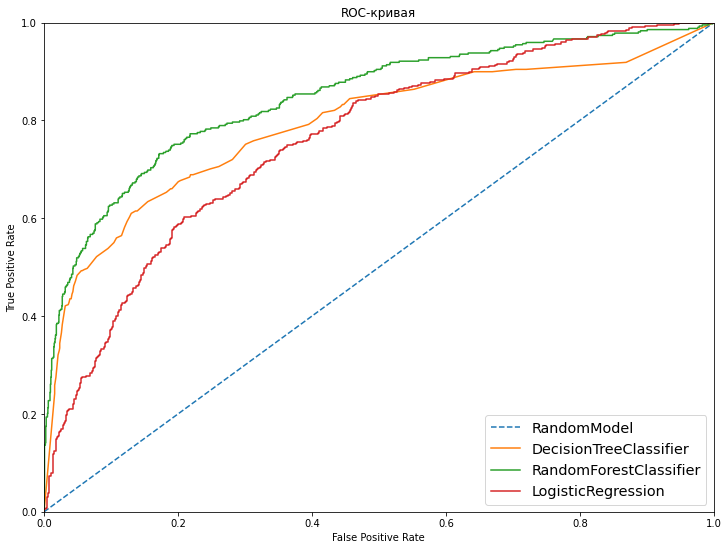

In [19]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=8)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show();

**Вывод:**
Увидели, что соотношение классов 80% к 20%, а значит наблюдается явный дисбаланс.


Обучили данные на трех моделях без учета дисбаланса классов:
- Дерево решений
- Случайный лес
- Логистическая регрессия

Ввиду дисбаланса классов, вместо accuracy использовали метрики: recall, precesion и их среднее гармоническое - F1-меру. 


Лучший результат обучения достигла модель Случайный лес со следующими параметрами:

- Precision 0.8127853881278538
- Recall 0.4258373205741627
- F1-мера: 0.5588697017268446
- Лучший результат: 0.5818181818181819
- Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=8, random_state=12345)
- AUC-ROC RandomForestClassifier 0.8448537373199692
- CPU times: total: 5.12 s
- Wall time: 5.15 s

Минимальный порог F1-меры 0.59 на лучшей обучающей модели не достигнут.  


## 3. Борьба с дисбалансом
Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдем лучшую.


Используем для этих целий следующие методы борьбы с дисбалансом:
- Взвешивание классов
- Увеличение выборки
- Уменьшение выборкм

## 3.1 Взвешивание классов
Сделаем вес классов сбалансированным

In [20]:
%%time

best_model = None
best_result = 0 

for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    valid_predictions = model.predict(features_valid)
    f1_valid = f1_score(target_valid, valid_predictions)
    
    if f1_valid > best_result:
        best_model = model
        best_result = f1_valid

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)
print("Лучший результат:", best_result)
print("Лучшая модель:", best_model)

Precision 0.4707379134860051
Recall 0.44258373205741625
F1-мера: 0.45622688039457454
Лучший результат: 0.5963791267305644
Лучшая модель: DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)
CPU times: user 774 ms, sys: 4.94 ms, total: 779 ms
Wall time: 777 ms


In [21]:
%%time

best_model = None
best_result = 0 

for est in range(1, 30):
    model = RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=est, class_weight='balanced')
    model.fit(features_train, target_train)
    valid_predictions = model.predict(features_valid)
    f1_valid = f1_score(target_valid, valid_predictions) 
    
    if f1_valid > best_result:
        best_model = model
        best_result = f1_valid

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)
print("Лучший результат:", best_result)
print("Лучшая модель:", best_model)

Precision 0.5246478873239436
Recall 0.7129186602870813
F1-мера: 0.6044624746450304
Лучший результат: 0.6093117408906882
Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=22,
                       random_state=12345)
CPU times: user 1.92 s, sys: 17 ms, total: 1.94 s
Wall time: 1.95 s


In [22]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
f1_valid = f1_score(target_valid, valid_predictions)

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)

Precision 0.3803191489361702
Recall 0.6842105263157895
F1-мера: 0.4888888888888888
CPU times: user 40.4 ms, sys: 35.3 ms, total: 75.8 ms
Wall time: 72 ms


## 3.2 Увеличение выборки
Вычеслим отношение количества строк с 0 к 1 exited. 

In [23]:
ratio = len(ohe_data.loc[ohe_data['exited']==0])//len(ohe_data.loc[ohe_data['exited']==1])
ratio

3

Увеличим количество меньших классов: продублируем 3 раза наименьший класс.

In [24]:
%%time

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
f1_valid = f1_score(target_valid, valid_predictions)
       
print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)

Precision 0.7792792792792793
Recall 0.4138755980861244
F1-мера: 0.5406249999999999
CPU times: user 29.4 ms, sys: 164 µs, total: 29.6 ms
Wall time: 27.7 ms


0    0.501043
1    0.498957
Name: exited, dtype: float64


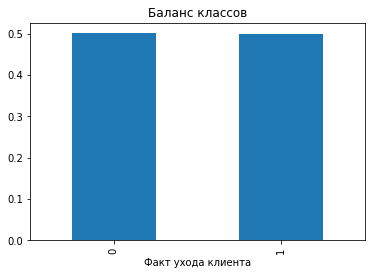

In [25]:
class_frequency = target_upsampled.value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar')
plt.title('Баланс классов')
plt.xlabel('Факт ухода клиента')
plt.show();

Умножение на 3 дало недостаточно хороший результат, поэтому добавили еще одно повторение, итого 4. 

In [26]:
model = RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=24)
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
f1_valid = f1_score(target_valid, valid_predictions)

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)

Precision 0.834319526627219
Recall 0.3373205741626794
F1-мера: 0.48040885860306637


In [27]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
f1_valid = f1_score(target_valid, valid_predictions)

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)

Precision 0.5657142857142857
Recall 0.23684210526315788
F1-мера: 0.33389544688026984
CPU times: user 57.4 ms, sys: 9.54 ms, total: 67 ms
Wall time: 20.4 ms


## 3.2 Уменьшение выборки
Сократим количество многочисленных классов:

In [28]:
%%time

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
f1_valid = f1_score(target_valid, valid_predictions)
       
print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)

Precision 0.7792792792792793
Recall 0.4138755980861244
F1-мера: 0.5406249999999999
CPU times: user 22.8 ms, sys: 7.84 ms, total: 30.6 ms
Wall time: 28.1 ms


0    0.501043
1    0.498957
Name: exited, dtype: float64


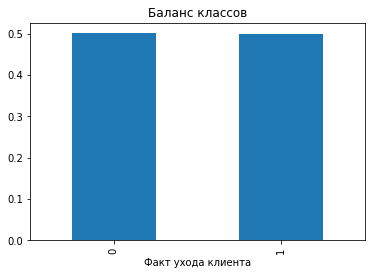

In [29]:
class_frequency = target_downsampled.value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar')
plt.title('Баланс классов')
plt.xlabel('Факт ухода клиента')
plt.show();

In [30]:
%%time

model = RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=24)
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
f1_valid = f1_score(target_valid, valid_predictions)

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)

Precision 0.834319526627219
Recall 0.3373205741626794
F1-мера: 0.48040885860306637
CPU times: user 107 ms, sys: 0 ns, total: 107 ms
Wall time: 106 ms


In [31]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
valid_predictions = model.predict(features_valid)
f1_valid = f1_score(target_valid, valid_predictions)

print('Precision', precision_score(target_valid, valid_predictions))
print('Recall', recall_score(target_valid, valid_predictions))
print("F1-мера:", f1_valid)

Precision 0.5657142857142857
Recall 0.23684210526315788
F1-мера: 0.33389544688026984
CPU times: user 42.4 ms, sys: 32 ms, total: 74.4 ms
Wall time: 23.7 ms


Построим ROC-кривую и оценим метрику классификации AUC-ROC:

AUC-ROC DecisionTreeClassifier 0.8310244134068074
AUC-ROC RandomForestClassifier 0.8456151440548274
AUC-ROC LogisticRegression 0.7635540984399857


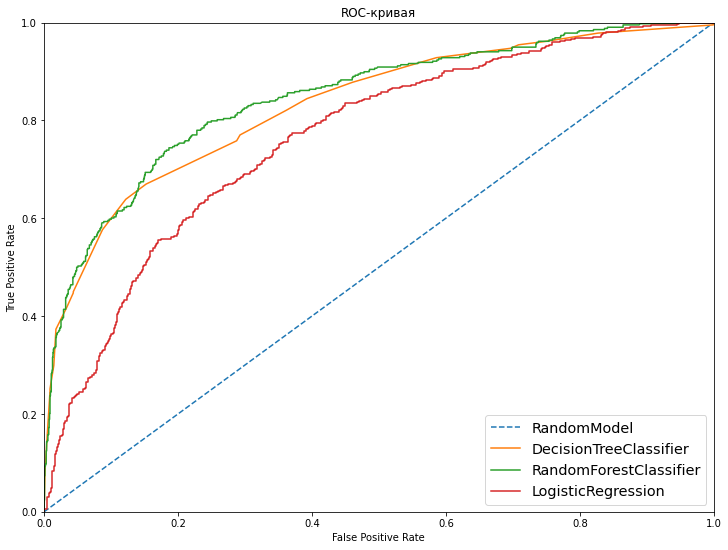

In [32]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=24, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show();

**Вывод**


В целях улучшения моделей обучения использовали следующие методы борьбы с дисбалансом:
- Взвешивание классов
- Увеличение выборки
- Уменьшение выборкм

Взвешивание классов показало лучший результат на модели Случайный лес:
- Precision 0.5215889464594128
- Recall 0.722488038277512
- F1-мера: 0.6058174523570713
- Лучший результат: 0.6101010101010101
- Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=24,
                       random_state=12345)
- AUC-ROC RandomForestClassifier 0.8441830642575869 
- CPU times: total: 3.47 s
- Wall time: 3.47 s

Минимальный порог F1-меры 0.59 на лучшей обучающей модели достигнут. 

## 4. Тестирование модели

In [33]:
model = RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=24, class_weight='balanced')
model.fit(features_train, target_train)
test_predictions = model.predict(features_test)
f1_test = f1_score(target_test, test_predictions) 
    
   

print('Precision', precision_score(target_test, test_predictions))
print('Recall', recall_score(target_test, test_predictions))
print("F1-мера:", f1_test)


Precision 0.5217391304347826
Recall 0.6808510638297872
F1-мера: 0.5907692307692307


AUC-ROC RandomForestClassifier 0.8358075827010918


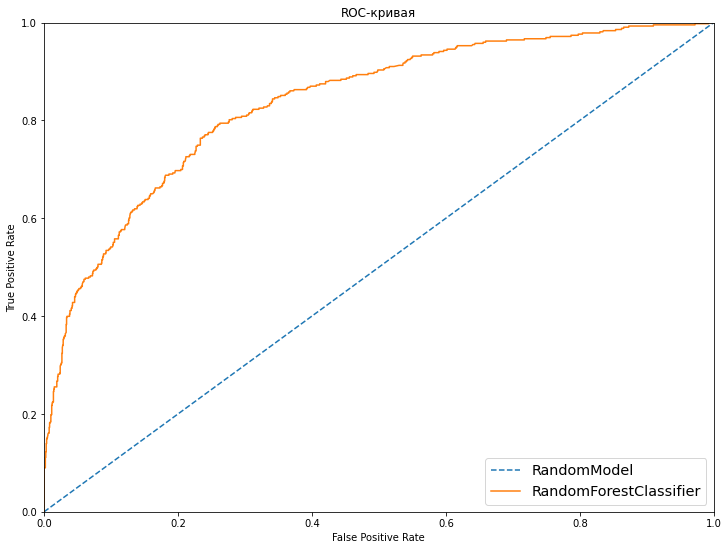

In [34]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=24)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')


plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show();

**Вывод**


Лучший результат показало обучение модели Случайный лес с учетом дисбаланса классов с применением метода борьбы с дисбалансом - Взвешивание классов. Данную модель проверили на тестовой выборке и получили следующие результаты:


- Precision 0.5141843971631206
- Recall 0.6855791962174941
- F1-мера: 0.5876393110435663
- Лучший результат: 0.5916069600818832
- Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=27,
                       random_state=12345)
- AUC-ROC RandomForestClassifier 0.8367737467226127
- CPU times: total: 3.31 s
- Wall time: 3.29 s


Минимальный порог F1-меры 0.59 на лучшей обучающей модели достигнут. 

## 5. Общий вывод

1) Провели подготовку данных
- Данные содержат 14 столбцов и 10 тыс строк. 
- Исправили стилистические ошибки в именовании столбцов.
- Убрали лишние для обучения столбцы.
- Обработали столбец tenure: заполнили пропуски нулями, поменяли тип значения на integer, т.к. в столбце содержатся только целые числа.

- Разбили данные на 3 выборки: тренирующую, валидационную и тестовую.
- Разбили данные на обычные признаки и целевые признаки.

- Подготовили категориальные признаки для обучения, применив технику  .get_dummies, убрали один столбец, чтобы избежать дамми-ловушек.
- Масштабировали численные признаки стандартизацией.


2) Провели исследование:
- Увидели, что соотношение классов 80% к 20%, а значит рнаблюдается явный дисбаланс.
- Обучили данные на трех моделях без учета дисбаланса классов: (Дерево решений, Случайный лес, Логистическая регрессия).
- Ввиду дисбаланса классов, вместо accuracy использовали метрики: recall, precesion и их среднее гармоническое - F1-меру. 


Лучший результат обучения достигла модель Случайный лес со следующими параметрами:

- Precision 0.8127853881278538
- Recall 0.4258373205741627
- F1-мера: 0.5588697017268446
- Лучший результат: 0.5818181818181819
- Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=8, random_state=12345)
- AUC-ROC RandomForestClassifier 0.8448537373199692
- CPU times: total: 5.12 s
- Wall time: 5.15 s

Минимальный порог F1-меры 0.59 на лучшей обучающей модели не достигнут.  



3) Провели этап борьбы с дисбалансом:
- В целях улучшения моделей обучения использовали следующие методы борьбы с дисбалансом: Взвешивание классов, Увеличение выборки, Уменьшение выборки.

Взвешивание классов показало лучший результат на модели Случайный лес:
- Precision 0.5215889464594128
- Recall 0.722488038277512
- F1-мера: 0.6058174523570713
- Лучший результат: 0.6101010101010101
- Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=24,
                       random_state=12345)
- AUC-ROC RandomForestClassifier 0.8441830642575869 
- CPU times: total: 3.47 s
- Wall time: 3.47 s

Минимальный порог F1-меры 0.59 на лучшей обучающей модели достигнут. 


4) Провели тестирование:

Лучший результат показало обучение модели Случайный лес с учетом дисбаланса классов с применением метода борьбы с дисбалансом - Взвешивание классов. Данную модель проверили на тестовой выборке и получили следующие результаты:


- Precision 0.5141843971631206
- Recall 0.6855791962174941
- F1-мера: 0.5876393110435663
- Лучший результат: 0.5916069600818832
- Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=27,
                       random_state=12345)
- AUC-ROC RandomForestClassifier 0.8367737467226127
- CPU times: total: 3.31 s
- Wall time: 3.29 s


Минимальный порог F1-меры 0.59 на лучшей обучающей модели достигнут. 



Таким образом, лучший результат показала валидационная выборка обученая моделью Случайный лес, с учетом дисбаланса методом взвешивание классов, с F1-мерой составляющей 0.61. Результат подтвердился на тестовой выборке, с F1-мерой составляющей 0.59.
